In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

1.9.0


In [22]:
import pandas as pd
"""
Cement (component 1)(kg in a m^3 mixture)	
Blast Furnace Slag (component 2)(kg in a m^3 mixture)	
Fly Ash (component 3)(kg in a m^3 mixture)	
Water  (component 4)(kg in a m^3 mixture)	
Superplasticizer (component 5)(kg in a m^3 mixture)	
Coarse Aggregate  (component 6)(kg in a m^3 mixture)	
Fine Aggregate (component 7)(kg in a m^3 mixture)	
Age (day)
Concrete compressive strength(MPa, megapascals) 
"""
csv_path = "/Users/lidakuang/workspace/cs584-s18-lida-kuang/Final Project/data/Concrete_Data.csv"
column_names = ['CEM', 'BLA', 'ASH', 'WAT', 'PLA', 'CAGG', 'FAGG', 'AGE', 'STRENTH']
concreate_strength = pd.read_csv(csv_path, skiprows=1, names=column_names)
#df = pd.DataFrame(concreate_strength, columns= column_names)
concreate_strength

,CEM,BLA,ASH,WAT,PLA,CAGG,FAGG,AGE,STRENTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [9]:
from sklearn.utils import shuffle
# Shuffle the date set
concreate_strength = shuffle(concreate_strength)

/Users/lidakuang/anaconda2/envs/cs584/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [10]:
datax = concreate_strength.iloc[:,0:(len(concreate_strength.columns)-1)]
datay = concreate_strength.iloc[:,(len(concreate_strength.columns)-1):len(concreate_strength.columns)]
                                
#normalization to x
mean = datax.mean(axis=0)
std = datax.std(axis=0)
datax = (datax - mean) / std
datax[0:5]

,CEM,BLA,ASH,WAT,PLA,CAGG,FAGG,AGE
70,0.888292,1.336405,-0.846733,-0.537003,0.652066,-0.602142,-0.210543,-0.675355
732,0.649072,-0.856472,-0.846733,0.488555,-1.038638,1.068512,0.441772,-0.612034
687,-0.432202,0.963199,-0.846733,0.488555,-1.038638,-0.004102,-0.305334,0.701883
289,-0.948917,-0.332592,1.059607,-0.532320,0.334013,1.112240,0.088799,-0.675355
291,-0.948917,-0.332592,1.059607,-0.532320,0.334013,1.112240,0.088799,-0.279597


In [11]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(datax, datay, test_size=0.2)

/Users/lidakuang/anaconda2/envs/cs584/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [12]:
lm = linear_model.LinearRegression()

model = lm.fit(trainx, trainy)
y_hat = lm.predict(testx)
y_hat[0:5]

array([[31.45991319],
       [33.45174373],
       [25.69311607],
       [38.4747655 ],
       [28.46090424]])

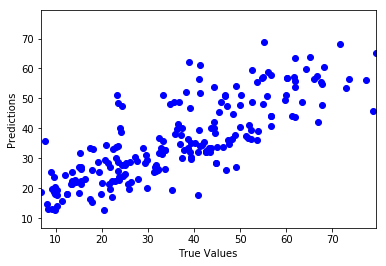

In [14]:
from matplotlib import pyplot as plt

limMax = max(float(testy.max()), float(y_hat.max()))
limMin = min(float(testy.min()), float(y_hat.min()))
plt.plot(testy, y_hat, 'bo')
plt.xlabel('True Values')
plt.xlim(limMin, limMax)
plt.ylabel('Predictions')
plt.ylim(limMin, limMax)
plt.show()

In [23]:
print('80% splite R2 Score:', model.score(testx, testy))

80% splite R2 Score: 0.5229142626970783


In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=True, shuffle=True)
datax = concreate_strength.iloc[:,0:(len(concreate_strength.columns)-1)].values
datay = concreate_strength.iloc[:,(len(concreate_strength.columns)-1):len(concreate_strength.columns)].values
splits = kf.split(datax, y=datay)

lm = linear_model.LinearRegression()

r2s = []
for train_index, test_index in splits:
    trainx = datax[train_index]
    testx = datax[test_index]
    trainy = datay[train_index]
    testy = datay[test_index]
    
    model = lm.fit(trainx, trainy)
    
    r2 =  model.score(testx, testy)
    r2s.append(r2)
    print('R2 Score:', r2)
    
    
print('Average R2 Score', np.average(r2s))

R2 Score: 0.5210125654324624
R2 Score: 0.5404158815770888
R2 Score: 0.6627321309593508
R2 Score: 0.6867785806136337
R2 Score: 0.619768021051541
Average R2 Score 0.6061414359268154
